# Laboratory practice № 8 (Modal controllers and observers)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 8

## Preparation

In [50]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
from matplotlib.ticker import FormatStrFormatter
import scipy

In [51]:
dt = 0.001

In [52]:
t = sympy.symbols("t",real=True)

## Task 1

In [53]:
A = np.array([
    [-1, 0, 0, 0],
    [0, 2, 0, 0],
    [0, 0, 3, 4],
    [0, 0, -4, 3]
])

B = np.array([
    [0],
    [5],
    [0],
    [6]
])

sigma_1 = [-1]*4
sigma_2 = [-1, -10, -100, -100]
sigma_3 = [-1, -10, 4j, -4j]
sigma_4 = [-1, -10, -3 + 4j, -3 -4j]


In [54]:
U = np.concatenate([B, A@B, A@A@B, A@A@A@B],axis=1)
U

array([[   0,    0,    0,    0],
       [   5,   10,   20,   40],
       [   0,   24,  144,  264],
       [   6,   18,  -42, -702]])

In [55]:
np.linalg.matrix_rank(U)

3

In [56]:
scipy.linalg.eigvals(A)

array([ 3.+4.j,  3.-4.j, -1.+0.j,  2.+0.j])

In [57]:
J_P, J = sympy.Matrix(A).jordan_form()

In [58]:
J

Matrix([
[-1, 0,       0,       0],
[ 0, 2,       0,       0],
[ 0, 0, 3 - 4*I,       0],
[ 0, 0,       0, 3 + 4*I]])

In [59]:
J_P.inv()@B

Matrix([
[0],
[5],
[3],
[3]])

-1 is not controllable, but stable

In [60]:
sigma_1

[-1, -1, -1, -1]

In [61]:
G_1 = np.array([
    [-1, 1, 0, 0],
    [0, -1, 1, 0],
    [0, 0, -1, 1],
    [0, 0, 0, -1]
])
Y_1 = np.array([0,1,1,1]).reshape((1,-1))

In [62]:
B@Y_1

array([[0, 0, 0, 0],
       [0, 5, 5, 5],
       [0, 0, 0, 0],
       [0, 6, 6, 6]])

In [63]:
P_1 = scipy.linalg.solve_sylvester(A,-G_1,B@Y_1)
P_1

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.66666667,  2.22222222,  2.40740741],
       [ 0.        , -0.75      , -0.9375    , -0.9609375 ],
       [ 0.        ,  0.75      ,  0.75      ,  0.7265625 ]])

In [64]:
K_1 = -Y_1 @ np.linalg.pinv(P_1)
K_1

array([[ 0.        , -0.31764706, -0.94117647, -1.56862745]])

In [65]:
scipy.linalg.eigvals(A + B@K_1)

array([-1.00007639+0.00000000e+00j, -0.99996181+6.61508003e-05j,
       -0.99996181-6.61508003e-05j, -1.        +0.00000000e+00j])

In [66]:
sys_1 = ctrl.ss(A + B@K_1,np.zeros((4,1)),np.zeros((1,4)),0)
sys_1

<LinearIOSystem:sys[14]:['u[0]']->['y[0]']>

In [67]:
time_1 = np.linspace(0,10,int(10/dt))

In [68]:
y_1 = ctrl.initial_response(sys_1,time_1,X0=np.ones((4,1)))

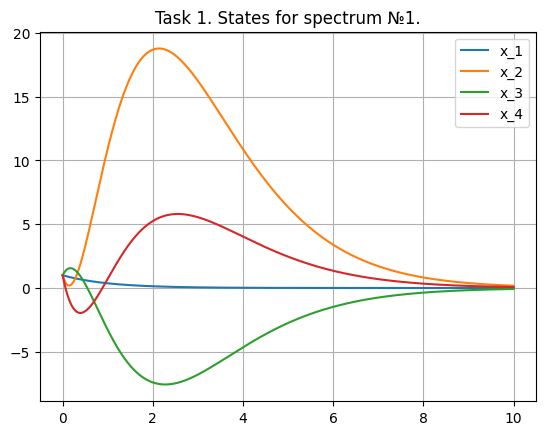

In [69]:
plt.plot(time_1,y_1.states[0,:],label="x_1")
plt.plot(time_1,y_1.states[1,:],label="x_2")
plt.plot(time_1,y_1.states[2,:],label="x_3")
plt.plot(time_1,y_1.states[3,:],label="x_4")
plt.title("Task 1. States for spectrum №1.")
plt.grid()
plt.legend()

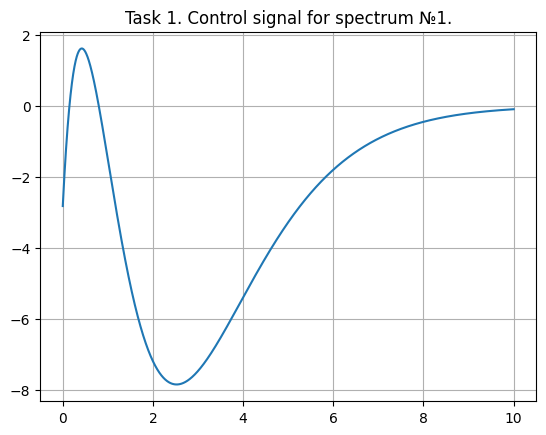

In [70]:
plt.plot(time_1,(K_1@y_1.states).reshape(-1))
plt.title("Task 1. Control signal for spectrum №1.")
plt.grid()

In [71]:
sigma_2

[-1, -10, -100, -100]

In [72]:
G_2 = np.array([
    [-1, 0, 0, 0],
    [0, -10, 0, 0],
    [0, 0, -100, 1],
    [0, 0, 0, -100]
])
Y_2 = np.array([0,1,1,1]).reshape((1,-1))
P_2 = scipy.linalg.solve_sylvester(A,-G_2,B@Y_2)
K_2 = -Y_2 @ np.linalg.pinv(P_2)
K_2

array([[    0.        , -1468.8       ,  -849.875     ,  1187.66666667]])

In [73]:
scipy.linalg.eigvals(A + B@K_2)

array([-100.+7.75575222e-05j, -100.-7.75575222e-05j,
        -10.+0.00000000e+00j,   -1.+0.00000000e+00j])

In [74]:
sys_2 = ctrl.ss(A + B@K_2,np.zeros((4,1)),np.zeros((1,4)),0)
time_2 = np.linspace(0,1,int(1/dt))
y_2 = ctrl.initial_response(sys_2,time_2,X0=np.ones((4,1)))

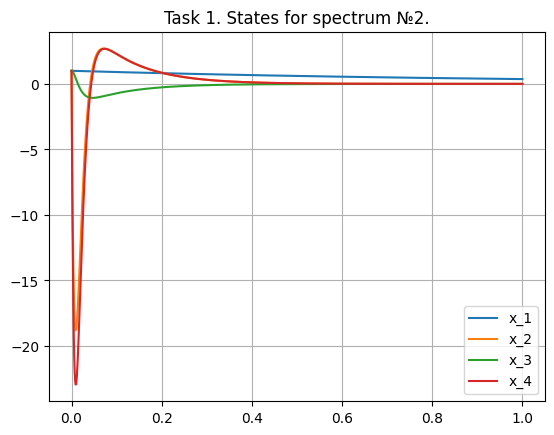

In [75]:
plt.plot(time_2,y_2.states[0,:],label="x_1")
plt.plot(time_2,y_2.states[1,:],label="x_2")
plt.plot(time_2,y_2.states[2,:],label="x_3")
plt.plot(time_2,y_2.states[3,:],label="x_4")
plt.title("Task 1. States for spectrum №2.")
plt.grid()
plt.legend()

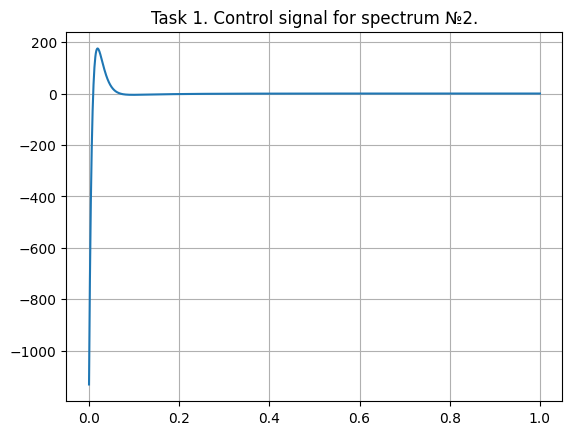

In [76]:
plt.plot(time_2,(K_2@y_2.states).reshape(-1))
plt.title("Task 1. Control signal for spectrum №2.")
plt.grid()

In [77]:
sigma_3

[-1, -10, 4j, (-0-4j)]

In [78]:
G_3 = np.array([
    [-1, 0, 0, 0],
    [0, -10, 0, 0],
    [0, 0, 0, 4],
    [0, 0, -4, 0]
])
Y_3 = np.array([0,1,1,1]).reshape((1,-1))
P_3 = scipy.linalg.solve_sylvester(A,-G_3,B@Y_3)
K_3 = -Y_3 @ np.linalg.pinv(P_3)
K_3

array([[ 0.        , -2.82352941, -3.46323529, -0.64705882]])

In [79]:
scipy.linalg.eigvals(A + B@K_3)

array([-2.31065167e-15+4.j, -2.31065167e-15-4.j, -1.00000000e+01+0.j,
       -1.00000000e+00+0.j])

In [80]:
sys_3 = ctrl.ss(A + B@K_3,np.zeros((4,1)),np.zeros((1,4)),0)
time_3 = np.linspace(0,10,int(10/dt))
y_3 = ctrl.initial_response(sys_3,time_3,X0=np.ones((4,1)))

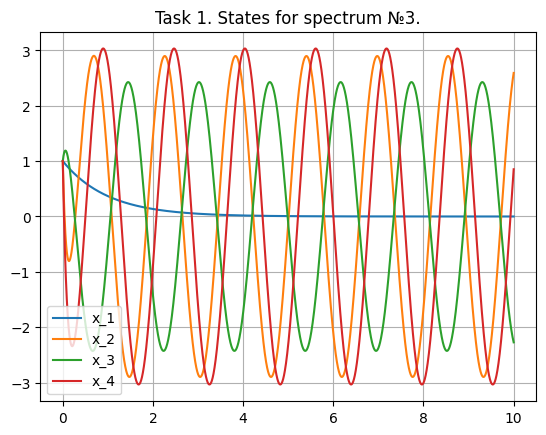

In [81]:
plt.plot(time_3,y_3.states[0,:],label="x_1")
plt.plot(time_3,y_3.states[1,:],label="x_2")
plt.plot(time_3,y_3.states[2,:],label="x_3")
plt.plot(time_3,y_3.states[3,:],label="x_4")
plt.title("Task 1. States for spectrum №3.")
plt.grid()
plt.legend()

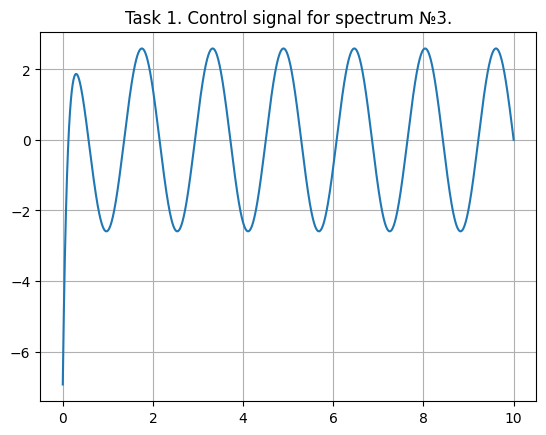

In [82]:
plt.plot(time_3,(K_3@y_3.states).reshape(-1))
plt.title("Task 1. Control signal for spectrum №3.")
plt.grid()

In [83]:
sigma_4

[-1, -10, (-3+4j), (-3-4j)]

In [84]:
G_4 = np.array([
    [-1, 0, 0, 0],
    [0, -10, 0, 0],
    [0, 0, -3, 4],
    [0, 0, -4, -3]
])
Y_4 = np.array([0,1,1,1]).reshape((1,-1))
P_4 = scipy.linalg.solve_sylvester(A,-G_4,B@Y_4)
K_4 = -Y_4 @ np.linalg.pinv(P_4)
K_4

array([[ 0.        , -5.78823529, -8.20588235,  0.82352941]])

In [85]:
scipy.linalg.eigvals(A + B@K_4)

array([ -3.+4.j,  -3.-4.j, -10.+0.j,  -1.+0.j])

In [86]:
sys_4 = ctrl.ss(A + B@K_4,np.zeros((4,1)),np.zeros((1,4)),0)
time_4 = np.linspace(0,5,int(5/dt))
y_4 = ctrl.initial_response(sys_4,time_4,X0=np.ones((4,1)))

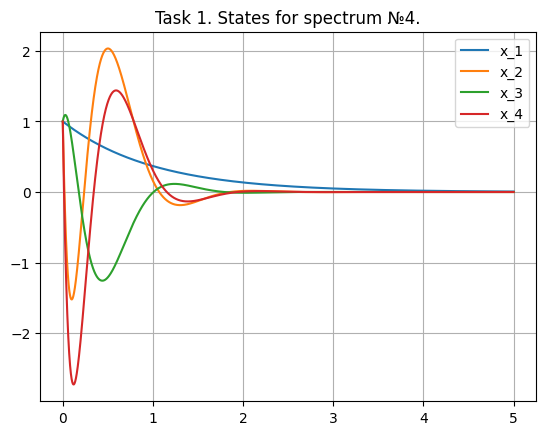

In [87]:
plt.plot(time_4,y_4.states[0,:],label="x_1")
plt.plot(time_4,y_4.states[1,:],label="x_2")
plt.plot(time_4,y_4.states[2,:],label="x_3")
plt.plot(time_4,y_4.states[3,:],label="x_4")
plt.title("Task 1. States for spectrum №4.")
plt.grid()
plt.legend()

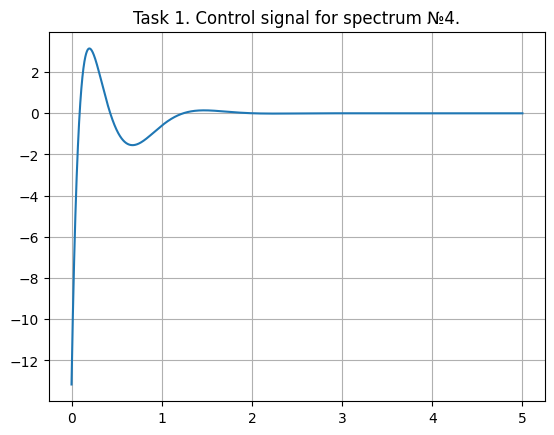

In [88]:
plt.plot(time_4,(K_4@y_4.states).reshape(-1))
plt.title("Task 1. Control signal for spectrum №4.")
plt.grid()

## Task 2

In [89]:
A = np.array([
    [0, 3, 0 ,0],
    [-3, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, -1, 0]
])
C = np.array([2, 0, 0, 3]).reshape((1,-1))

In [90]:
V = np.concatenate([
    C, C@A, C@A@A, C@A@A@A
])
V

array([[  2,   0,   0,   3],
       [  0,   6,  -3,   0],
       [-18,   0,   0,  -3],
       [  0, -54,   3,   0]])

In [91]:
np.linalg.matrix_rank(V)

4

In [92]:
J_P, J = sympy.Matrix(A).jordan_form()
J

Matrix([
[-3*I,  0, 0,   0],
[   0, -I, 0,   0],
[   0,  0, I,   0],
[   0,  0, 0, 3*I]])

In [93]:
C@J_P

Matrix([[2*I, 3, 3, -2*I]])

In [94]:
Y_5_8 = np.ones((4,1))
Q_1 = scipy.linalg.solve_sylvester(G_1,-A,Y_5_8@C)
Q_2 = scipy.linalg.solve_sylvester(G_2,-A,Y_5_8@C)
Q_3 = scipy.linalg.solve_sylvester(G_3,-A,Y_5_8@C)
Q_4 = scipy.linalg.solve_sylvester(G_4,-A,Y_5_8@C)
L_1 = np.linalg.inv(Q_1)@Y_5_8
L_2 = np.linalg.inv(Q_2)@Y_5_8
L_3 = np.linalg.inv(Q_3)@Y_5_8
L_4 = np.linalg.inv(Q_4)@Y_5_8

In [95]:
L_1, L_2, L_3, L_4

(array([[-2.        ],
        [ 0.58333333],
        [-0.16666667],
        [ 0.        ]]),
 array([[ 6881.31250001],
        [ -204.35416667],
        [ 3657.95833334],
        [-4657.87500001]]),
 array([[ 4.8125    ],
        [ 0.14583333],
        [ 5.625     ],
        [-6.875     ]]),
 array([[ 11.375     ],
        [-12.04166667],
        [  6.25      ],
        [-13.25      ]]))

In [96]:
sys_5 = ctrl.ss(A, [[0]]*4,C,0)
sys_5_obs = ctrl.ss(A + L_1@C,-L_1,C,0)
sys_6 = ctrl.ss(A, [[0]]*4,C,0)
sys_6_obs = ctrl.ss(A + L_2@C,-L_2,C,0)
sys_7 = ctrl.ss(A, [[0]]*4,C,0)
sys_7_obs = ctrl.ss(A + L_3@C,-L_3,C,0)
sys_8 = ctrl.ss(A, [[0]]*4,C,0)
sys_8_obs = ctrl.ss(A + L_4@C,-L_4,C,0)

In [97]:
time_5 = np.linspace(0,20,int(20/dt))
y_5 = ctrl.initial_response(sys_5,time_5,X0=np.ones((4,1)))
y_5_obs = ctrl.forced_response(sys_5_obs,time_5,X0=np.array([[2],[0],[0],[-1]]),U=y_5.outputs)
time_6 = np.linspace(0,5,int(5/dt))
y_6 = ctrl.initial_response(sys_6,time_6,X0=np.ones((4,1)))
y_6_obs = ctrl.forced_response(sys_6_obs,time_6,X0=np.array([[2],[0],[0],[-1]]),U=y_6.outputs)
time_7 = np.linspace(0,20,int(20/dt))
y_7 = ctrl.initial_response(sys_7,time_7,X0=np.ones((4,1)))
y_7_obs = ctrl.forced_response(sys_7_obs,time_7,X0=np.array([[2],[0],[0],[-1]]),U=y_7.outputs)
time_8 = np.linspace(0,20,int(20/dt))
y_8 = ctrl.initial_response(sys_8,time_8,X0=np.ones((4,1)))
y_8_obs = ctrl.forced_response(sys_8_obs,time_8,X0=np.array([[2],[0],[0],[-1]]),U=y_8.outputs)

Text(0.5, 1.0, '$x_4$ & $\\hat{x}_4$')

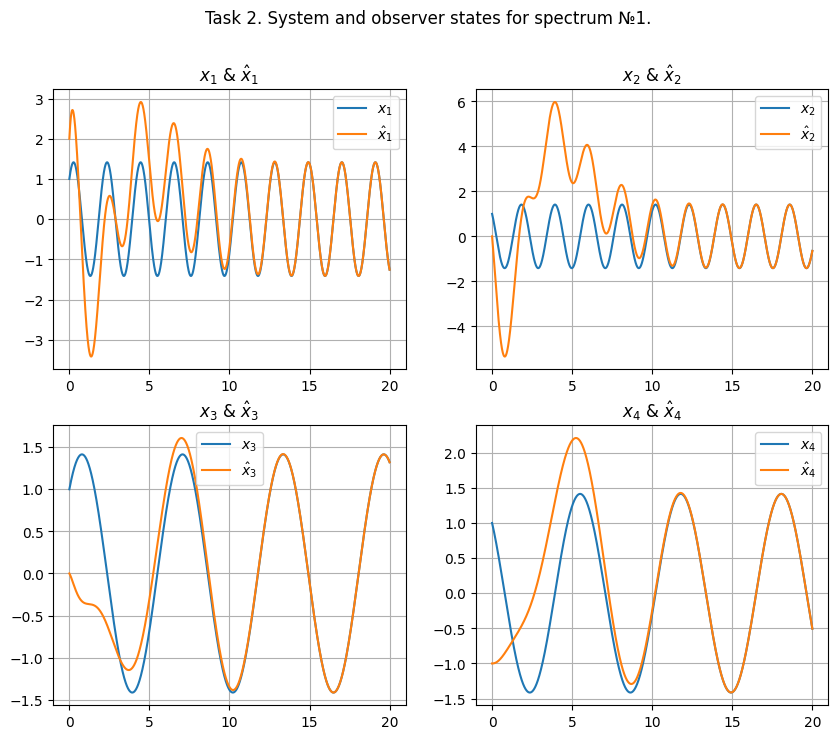

In [98]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Task 2. System and observer states for spectrum №1.")
ax[0,0].plot(time_5,y_5.states[0,:],label="$x_1$")
ax[0,0].plot(time_5,y_5_obs.states[0,:],label="$\hat{x}_1$")
ax[0,0].grid()
ax[0,0].legend()
ax[0,0].set_title("$x_1$ & $\hat{x}_1$")
ax[0,1].plot(time_5,y_5.states[1,:],label="$x_2$")
ax[0,1].plot(time_5,y_5_obs.states[1,:],label="$\hat{x}_2$")
ax[0,1].grid()
ax[0,1].legend()
ax[0,1].set_title("$x_2$ & $\hat{x}_2$")
ax[1,0].plot(time_5,y_5.states[2,:],label="$x_3$")
ax[1,0].plot(time_5,y_5_obs.states[2,:],label="$\hat{x}_3$")
ax[1,0].grid()
ax[1,0].legend()
ax[1,0].set_title("$x_3$ & $\hat{x}_3$")
ax[1,1].plot(time_5,y_5.states[3,:],label="$x_4$")
ax[1,1].plot(time_5,y_5_obs.states[3,:],label="$\hat{x}_4$")
ax[1,1].grid()
ax[1,1].legend()
ax[1,1].set_title("$x_4$ & $\hat{x}_4$")

Text(0.5, 1.0, 'Task 2. Errors for spectrum №1.')

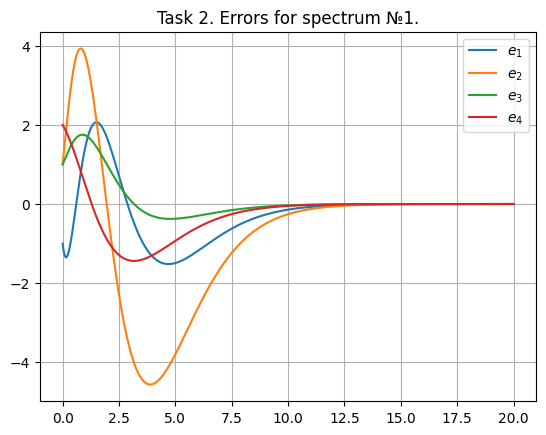

In [99]:
plt.plot(time_5,y_5.states[0,:]-y_5_obs.states[0,:],label="$e_1$")
plt.plot(time_5,y_5.states[1,:]-y_5_obs.states[1,:],label="$e_2$")
plt.plot(time_5,y_5.states[2,:]-y_5_obs.states[2,:],label="$e_3$")
plt.plot(time_5,y_5.states[3,:]-y_5_obs.states[3,:],label="$e_4$")
plt.grid()
plt.legend()
plt.title("Task 2. Errors for spectrum №1.")

Text(0.5, 1.0, '$x_4$ & $\\hat{x}_4$')

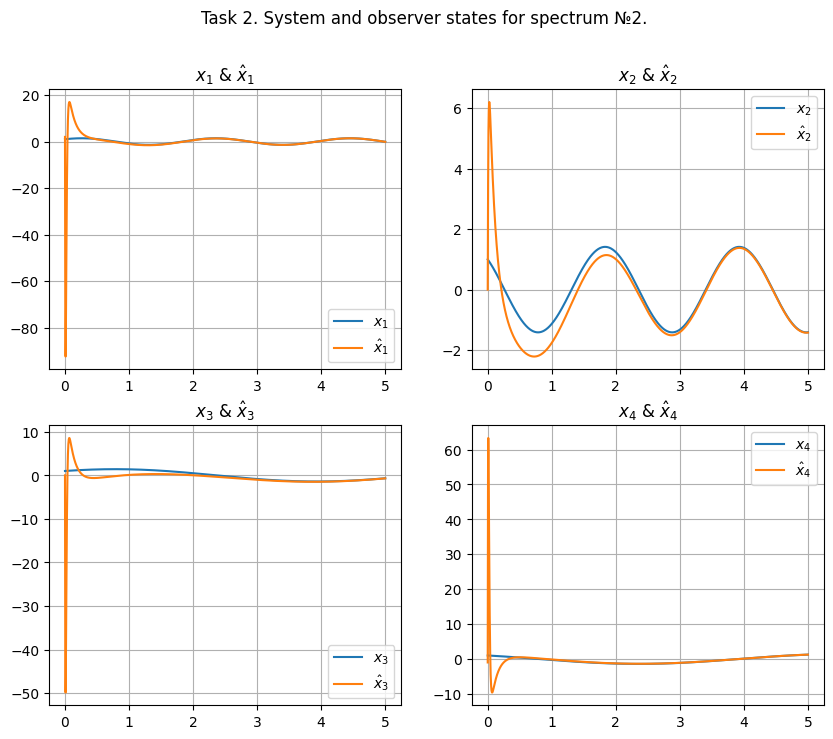

In [100]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Task 2. System and observer states for spectrum №2.")
ax[0,0].plot(time_6,y_6.states[0,:],label="$x_1$")
ax[0,0].plot(time_6,y_6_obs.states[0,:],label="$\hat{x}_1$")
ax[0,0].grid()
ax[0,0].legend()
ax[0,0].set_title("$x_1$ & $\hat{x}_1$")
ax[0,1].plot(time_6,y_6.states[1,:],label="$x_2$")
ax[0,1].plot(time_6,y_6_obs.states[1,:],label="$\hat{x}_2$")
ax[0,1].grid()
ax[0,1].legend()
ax[0,1].set_title("$x_2$ & $\hat{x}_2$")
ax[1,0].plot(time_6,y_6.states[2,:],label="$x_3$")
ax[1,0].plot(time_6,y_6_obs.states[2,:],label="$\hat{x}_3$")
ax[1,0].grid()
ax[1,0].legend()
ax[1,0].set_title("$x_3$ & $\hat{x}_3$")
ax[1,1].plot(time_6,y_6.states[3,:],label="$x_4$")
ax[1,1].plot(time_6,y_6_obs.states[3,:],label="$\hat{x}_4$")
ax[1,1].grid()
ax[1,1].legend()
ax[1,1].set_title("$x_4$ & $\hat{x}_4$")

Text(0.5, 1.0, 'Task 2. Errors for spectrum №2.')

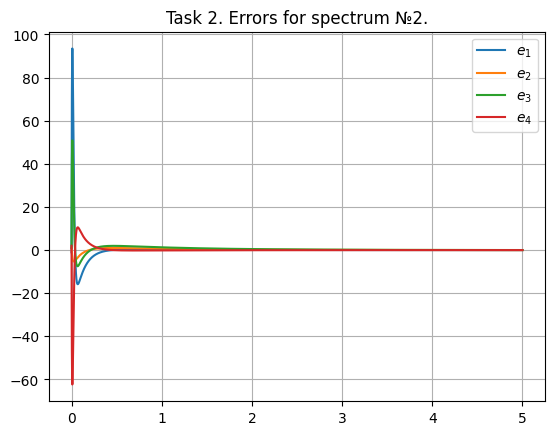

In [101]:
plt.plot(time_6,y_6.states[0,:]-y_6_obs.states[0,:],label="$e_1$")
plt.plot(time_6,y_6.states[1,:]-y_6_obs.states[1,:],label="$e_2$")
plt.plot(time_6,y_6.states[2,:]-y_6_obs.states[2,:],label="$e_3$")
plt.plot(time_6,y_6.states[3,:]-y_6_obs.states[3,:],label="$e_4$")
plt.grid()
plt.legend()
plt.title("Task 2. Errors for spectrum №2.")

Text(0.5, 1.0, '$x_4$ & $\\hat{x}_4$')

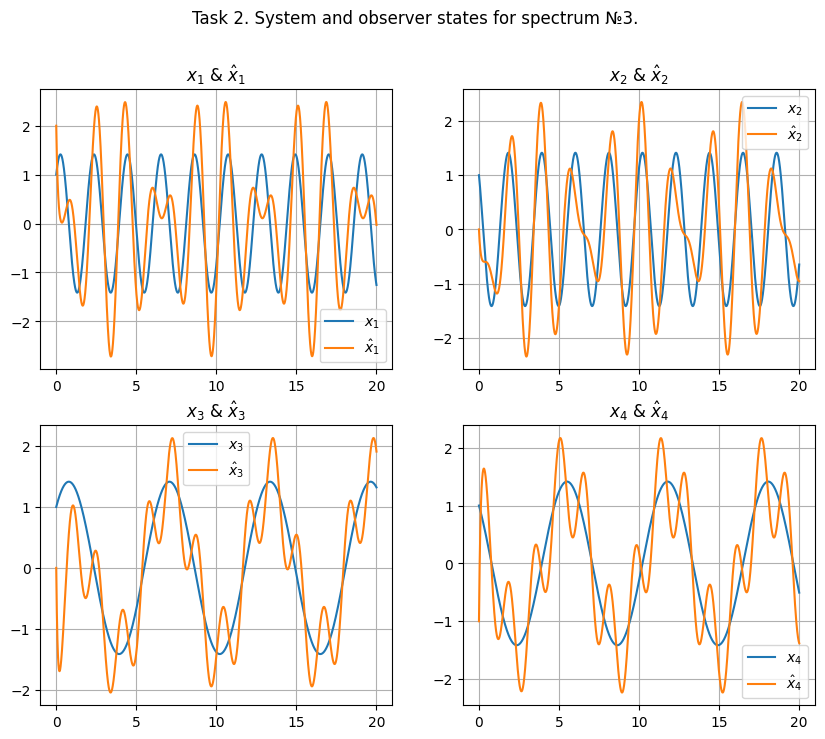

In [102]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Task 2. System and observer states for spectrum №3.")
ax[0,0].plot(time_7,y_7.states[0,:],label="$x_1$")
ax[0,0].plot(time_7,y_7_obs.states[0,:],label="$\hat{x}_1$")
ax[0,0].grid()
ax[0,0].legend()
ax[0,0].set_title("$x_1$ & $\hat{x}_1$")
ax[0,1].plot(time_7,y_7.states[1,:],label="$x_2$")
ax[0,1].plot(time_7,y_7_obs.states[1,:],label="$\hat{x}_2$")
ax[0,1].grid()
ax[0,1].legend()
ax[0,1].set_title("$x_2$ & $\hat{x}_2$")
ax[1,0].plot(time_7,y_7.states[2,:],label="$x_3$")
ax[1,0].plot(time_7,y_7_obs.states[2,:],label="$\hat{x}_3$")
ax[1,0].grid()
ax[1,0].legend()
ax[1,0].set_title("$x_3$ & $\hat{x}_3$")
ax[1,1].plot(time_7,y_7.states[3,:],label="$x_4$")
ax[1,1].plot(time_7,y_7_obs.states[3,:],label="$\hat{x}_4$")
ax[1,1].grid()
ax[1,1].legend()
ax[1,1].set_title("$x_4$ & $\hat{x}_4$")

Text(0.5, 1.0, 'Task 2. Errors for spectrum №3.')

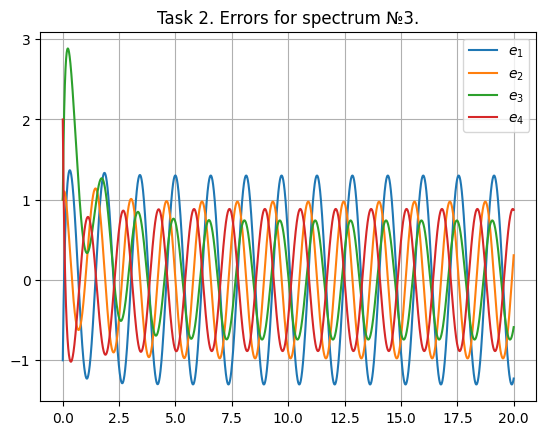

In [103]:
plt.plot(time_7,y_7.states[0,:]-y_7_obs.states[0,:],label="$e_1$")
plt.plot(time_7,y_7.states[1,:]-y_7_obs.states[1,:],label="$e_2$")
plt.plot(time_7,y_7.states[2,:]-y_7_obs.states[2,:],label="$e_3$")
plt.plot(time_7,y_7.states[3,:]-y_7_obs.states[3,:],label="$e_4$")
plt.grid()
plt.legend()
plt.title("Task 2. Errors for spectrum №3.")

Text(0.5, 1.0, '$x_4$ & $\\hat{x}_4$')

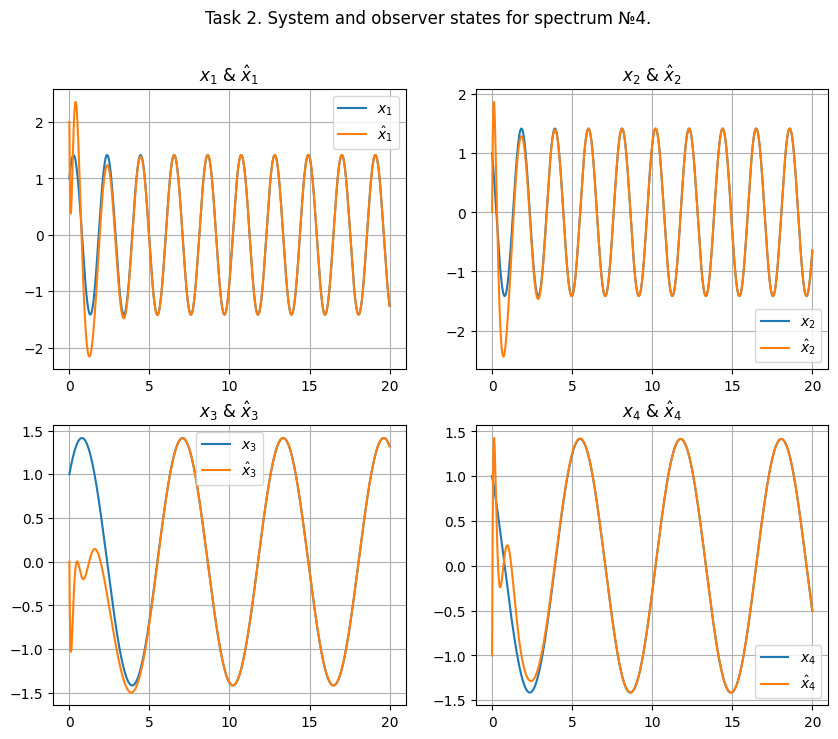

In [104]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Task 2. System and observer states for spectrum №4.")
ax[0,0].plot(time_8,y_8.states[0,:],label="$x_1$")
ax[0,0].plot(time_8,y_8_obs.states[0,:],label="$\hat{x}_1$")
ax[0,0].grid()
ax[0,0].legend()
ax[0,0].set_title("$x_1$ & $\hat{x}_1$")
ax[0,1].plot(time_8,y_8.states[1,:],label="$x_2$")
ax[0,1].plot(time_8,y_8_obs.states[1,:],label="$\hat{x}_2$")
ax[0,1].grid()
ax[0,1].legend()
ax[0,1].set_title("$x_2$ & $\hat{x}_2$")
ax[1,0].plot(time_8,y_8.states[2,:],label="$x_3$")
ax[1,0].plot(time_8,y_8_obs.states[2,:],label="$\hat{x}_3$")
ax[1,0].grid()
ax[1,0].legend()
ax[1,0].set_title("$x_3$ & $\hat{x}_3$")
ax[1,1].plot(time_8,y_8.states[3,:],label="$x_4$")
ax[1,1].plot(time_8,y_8_obs.states[3,:],label="$\hat{x}_4$")
ax[1,1].grid()
ax[1,1].legend()
ax[1,1].set_title("$x_4$ & $\hat{x}_4$")

Text(0.5, 1.0, 'Task 2. Errors for spectrum №4.')

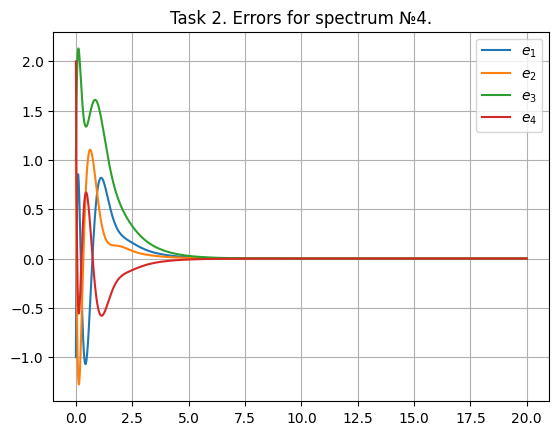

In [105]:
plt.plot(time_8,y_8.states[0,:]-y_8_obs.states[0,:],label="$e_1$")
plt.plot(time_8,y_8.states[1,:]-y_8_obs.states[1,:],label="$e_2$")
plt.plot(time_8,y_8.states[2,:]-y_8_obs.states[2,:],label="$e_3$")
plt.plot(time_8,y_8.states[3,:]-y_8_obs.states[3,:],label="$e_4$")
plt.grid()
plt.legend()
plt.title("Task 2. Errors for spectrum №4.")

## Task 3

In [106]:
A = np.array([
    [3, -11, -7, 5],
    [-11, 3, -5, 7],
    [-7, -5, 3, 11],
    [5, 7, 11, 3]
])
B = np.array([
    [2],
    [4],
    [2],
    [4]
])
C = np.array([
    [2, -2, 2, 2],
    [2, 4, -2, 4]
])

In [107]:
J_P, J = sympy.Matrix(A).jordan_form()

In [108]:
J

Matrix([
[-20, 0,  0,  0],
[  0, 4,  0,  0],
[  0, 0, 12,  0],
[  0, 0,  0, 16]])

In [109]:
J_P.inv()@B

Matrix([
[-1],
[ 2],
[ 1],
[ 2]])

In [110]:
C@J_P

Matrix([
[0,  0, 8, 0],
[0, 12, 0, 4]])

In [111]:
G = np.array([
    [-10, 0 ,0 ,0],
    [0, -11, 0, 0],
    [0, 0, -12, 0],
    [0, 0, 0, -13]
])
Y_cont = np.array([1,1,1,1]).reshape((1,-1))
Y_obs = np.array([
    [0, 0],
    [1, 1],
    [1, 1],
    [1, 1]
])
P = scipy.linalg.solve_sylvester(A,-G,B@Y_cont)
K = -Y_cont @ np.linalg.inv(P)
Q = scipy.linalg.solve_sylvester(G,-A,Y_obs@C)
L = np.linalg.pinv(Q)@Y_obs

In [112]:
scipy.linalg.eigvals(A + B@K)

array([-13.00000004+0.j, -11.99999987+0.j, -11.00000014+0.j,
        -9.99999995+0.j])

In [113]:
scipy.linalg.eigvals(A + L@C)

array([-10.99999999+0.j, -12.00000003+0.j, -12.99999998+0.j,
       -20.        +0.j])

In [114]:
A_new = np.block([
    [A + B@K, -B@K],
    [np.zeros_like(A), A + L@C]
])

In [115]:
sys = ctrl.ss(A_new,np.zeros((8,1)),np.zeros((1,8)),0)

In [116]:
time_ = np.linspace(0,3,int(3/dt))

In [117]:
y = ctrl.initial_response(sys,T=time_,X0=[-1,-1,-1,-1,2,2,2,2])

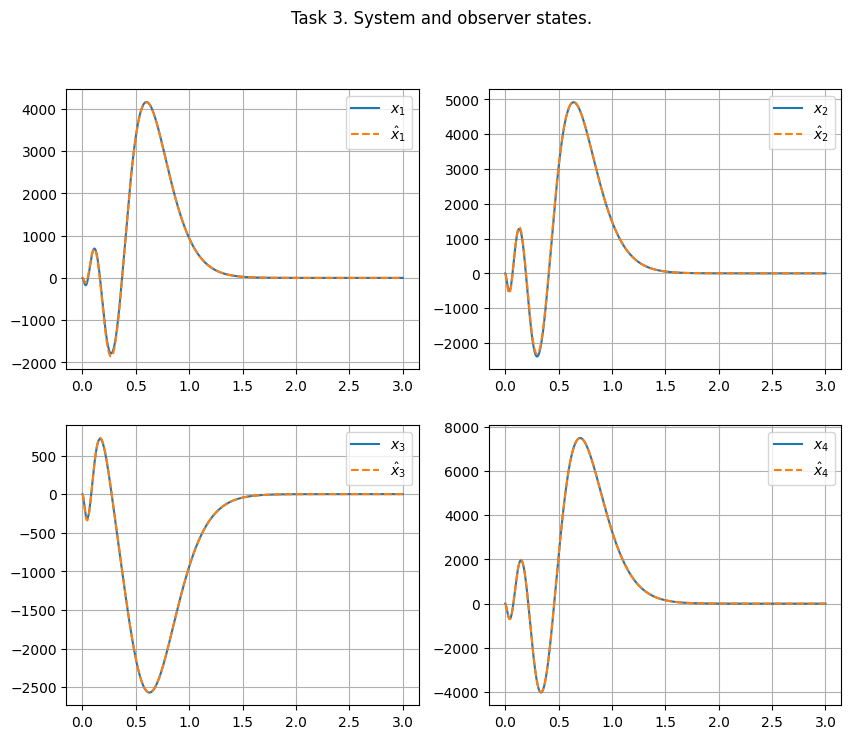

In [118]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Task 3. System and observer states.")
ax[0,0].plot(time_,y.states[0,:],label="$x_1$")
ax[0,0].plot(time_,y.states[0,:]+y.states[4,:],linestyle="--",label="$\hat{x}_1$")
ax[0,0].legend()
ax[0,0].grid()
ax[0,1].plot(time_,y.states[1,:],label="$x_2$")
ax[0,1].plot(time_,y.states[1,:]+y.states[5,:],linestyle="--",label="$\hat{x}_2$")
ax[0,1].legend()
ax[0,1].grid()
ax[1,0].plot(time_,y.states[2,:],label="$x_3$")
ax[1,0].plot(time_,y.states[2,:]+y.states[6,:],linestyle="--",label="$\hat{x}_3$")
ax[1,0].legend()
ax[1,0].grid()
ax[1,1].plot(time_,y.states[3,:],label="$x_4$")
ax[1,1].plot(time_,y.states[3,:]+y.states[7,:],linestyle="--",label="$\hat{x}_4$")
ax[1,1].legend()
ax[1,1].grid()

Text(0.5, 1.0, 'Task3. Observer errors.')

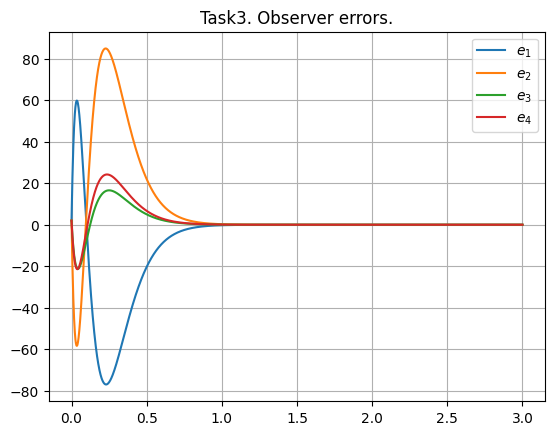

In [119]:
plt.plot(time_,y.states[4,:],label="$e_1$")
plt.plot(time_,y.states[5,:],label="$e_2$")
plt.plot(time_,y.states[6,:],label="$e_3$")
plt.plot(time_,y.states[7,:],label="$e_4$")
plt.legend()
plt.grid()
plt.title("Task3. Observer errors.")

In [120]:
K.shape, y.states[4:,:].shape

((1, 4), (4, 3000))

Text(0.5, 1.0, 'Task 3. Control signal.')

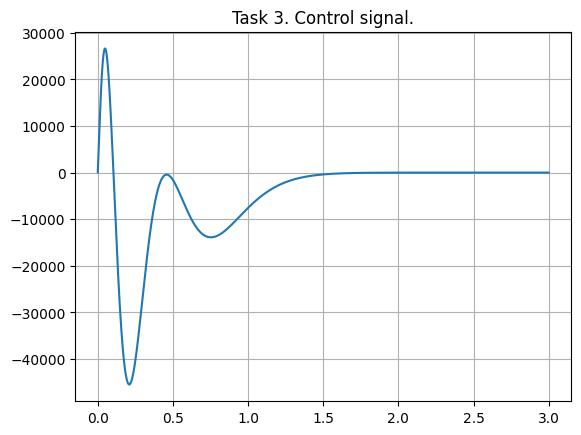

In [121]:
plt.plot(time_,(K@(y.states[4:,:]+y.states[:4,:])).reshape(-1))
plt.grid()
plt.title("Task 3. Control signal.")

In [122]:
(C @ y.states[:4,:]).shape

(2, 3000)

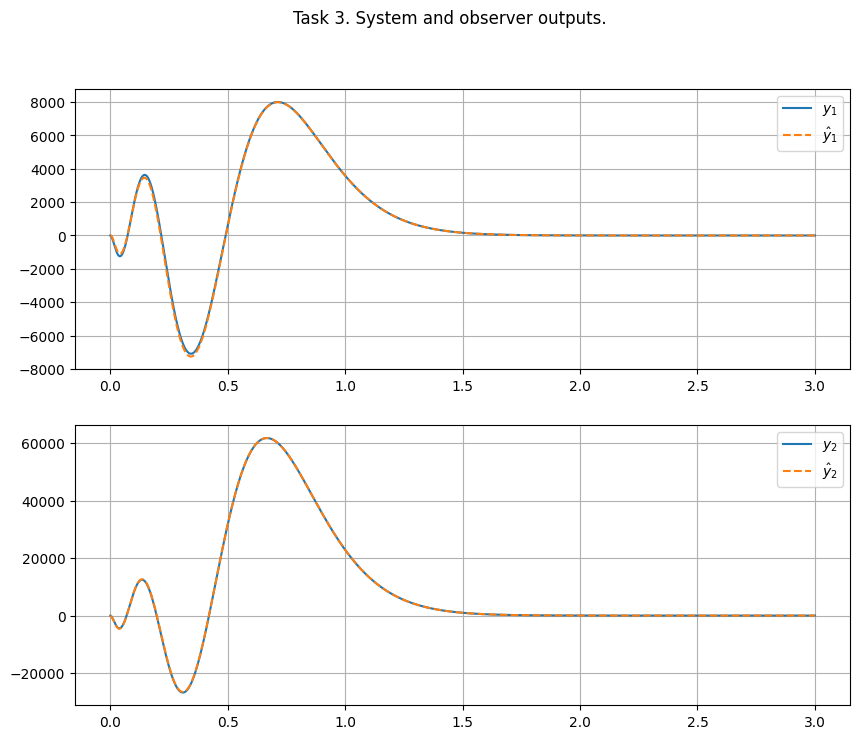

In [123]:
fig, ax = plt.subplots(2,1,figsize=(10,8))
fig.suptitle("Task 3. System and observer outputs.")
ax[0].plot(time_,(C@y.states[:4,:])[0],label="$y_1$")
ax[0].plot(time_,(C@(y.states[4:,:]+y.states[:4,:]))[0],linestyle="--",label="$\hat{y}_1$")
ax[0].legend()
ax[0].grid()

ax[1].plot(time_,(C@y.states[:4,:])[1],label="$y_2$")
ax[1].plot(time_,(C@(y.states[4:,:]+y.states[:4,:]))[1],linestyle="--",label="$\hat{y}_2$")
ax[1].legend()
ax[1].grid()

In [124]:
K, L

(array([[ 112.30208333, -118.40885417,   36.03125   ,   29.7421875 ]]),
 array([[ 164.55208333,  164.55208333],
        [-171.63541667, -171.63541667],
        [ -56.73958333,  -56.73958333],
        [ -63.82291667,  -63.82291667]]))